In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipldata/deliveries.csv
/kaggle/input/ipldata/matches.csv


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 
import matplotlib.ticker as ticker

%matplotlib inline

In [86]:
del_df=pd.read_csv('../input/ipldata/deliveries.csv')
mat_df=pd.read_csv('../input/ipldata/matches.csv')

In [87]:
del_df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [88]:

mat_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [89]:
del_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [90]:
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Let's  Explore matches data first

In [91]:
#Not necesssary for visualization but very important for Modeling
mat_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [92]:
mat_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [93]:
#venues


mat_df['venue'].value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

Maximum matches are played in Eden Gardens

In [94]:
mat_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [95]:
#Correcting Rising pune supergiants
mat_df['team1']=mat_df['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

mat_df['team2'].value_counts()
mat_df['team2']=mat_df['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

mat_df['winner'].value_counts()
mat_df['winner']=mat_df['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [96]:
#Copying this database 
df2=mat_df.copy()

df2=df2.sort_values(by=['season'],ascending=True)

# Let's see which team has won maximum matches with the help of DL method

In [97]:
dl=df2[df2['dl_applied']==1][['team1','team2','winner','toss_decision']]
dl

,team1,team2,winner,toss_decision
102,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat
99,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,bat
148,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat
122,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field
119,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field
251,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field
290,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field
280,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,bat
488,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad,field
536,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,field


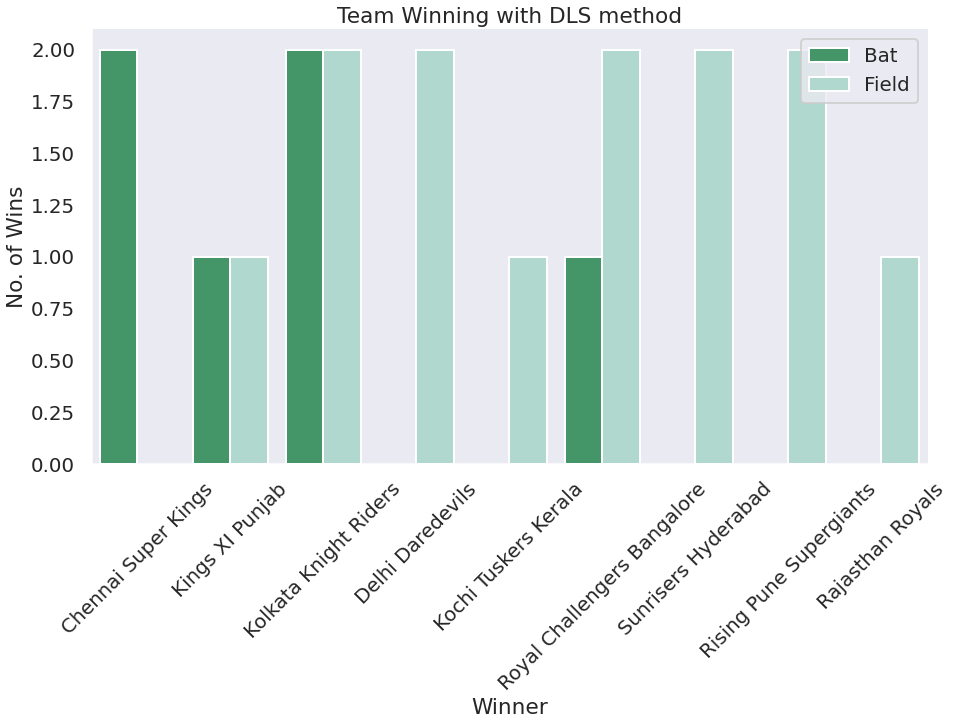

In [98]:
sns.set_style('dark')
plt.figure(figsize=(15,8))
grid=sns.countplot(x='winner',hue='toss_decision',data=dl,palette='BuGn_r')
sns.set_context("poster", font_scale = 0.9)
plt.xlabel('Winner')
plt.ylabel('No. of Wins')
plt.title('Team Winning with DLS method')
x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
plt.legend(['Bat','Field'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# It can be seen that Kolkata Knight Riders have won maximum number of times of DLS method
## 2 -Batting First
## 2 -Bowling First

In [99]:
df3=df2[['season','team1','team2' ,'city','winner','venue','toss_decision']]
df3.head()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 116 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   season         756 non-null    int64 
 1   team1          756 non-null    object
 2   team2          756 non-null    object
 3   city           749 non-null    object
 4   winner         752 non-null    object
 5   venue          756 non-null    object
 6   toss_decision  756 non-null    object
dtypes: int64(1), object(6)
memory usage: 47.2+ KB


(0.0, 90.0)

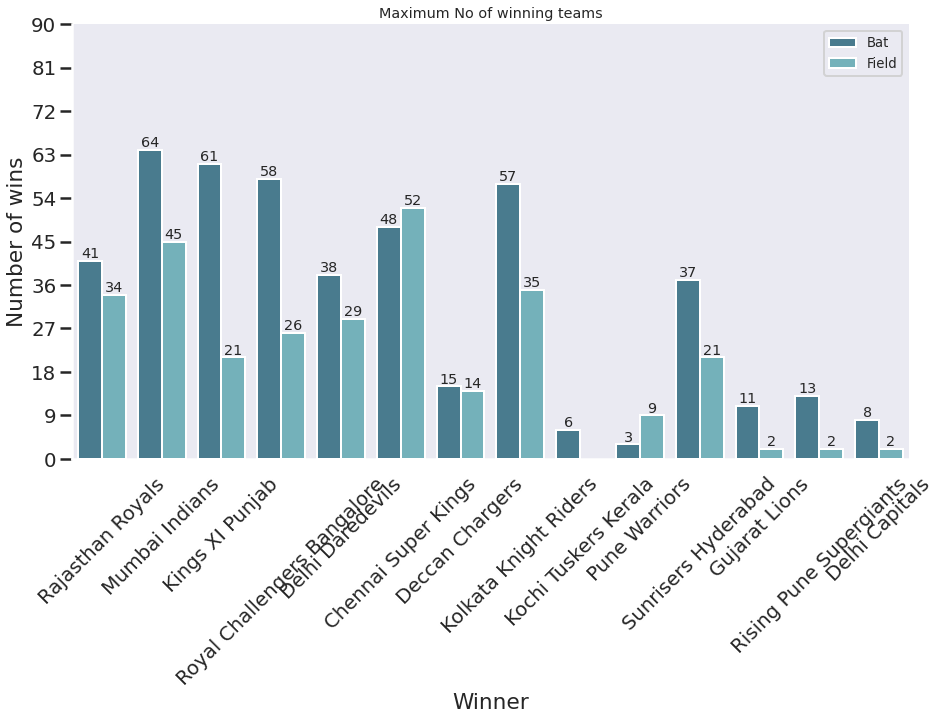

In [100]:
sns.set_style('dark')
plt.figure(figsize=(15,8))
ax=sns.countplot(x='winner',hue='toss_decision',data=df3,palette='GnBu_d',order=None)
sns.set_context("poster", font_scale = 0.6)
plt.xlabel('Winner')
plt.ylabel('Number of wins')
plt.title('Maximum No of winning teams')
x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
plt.legend(['Bat','Field'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Switch so count axis is on right, frequency on left
ax.yaxis.tick_left()

# Also switch the labels over
ax.yaxis.set_label_position('left')

ncount = 90
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
#ax2.set_ylim(0,50)
ax.set_ylim(0,ncount)


## 1. Mumbai Indians has Won Maximum Number of matches (109 matches) overall in IPL
## 2. Any team batting First has been on a winning side for maximum time except(Chennai Super Kings) 
  

# UMPIRES 

In [101]:
df4=df2[['umpire1','umpire2','winner']]
df4['umpire1'].value_counts().head()



HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
Name: umpire1, dtype: int64

(0.0, 100.0)

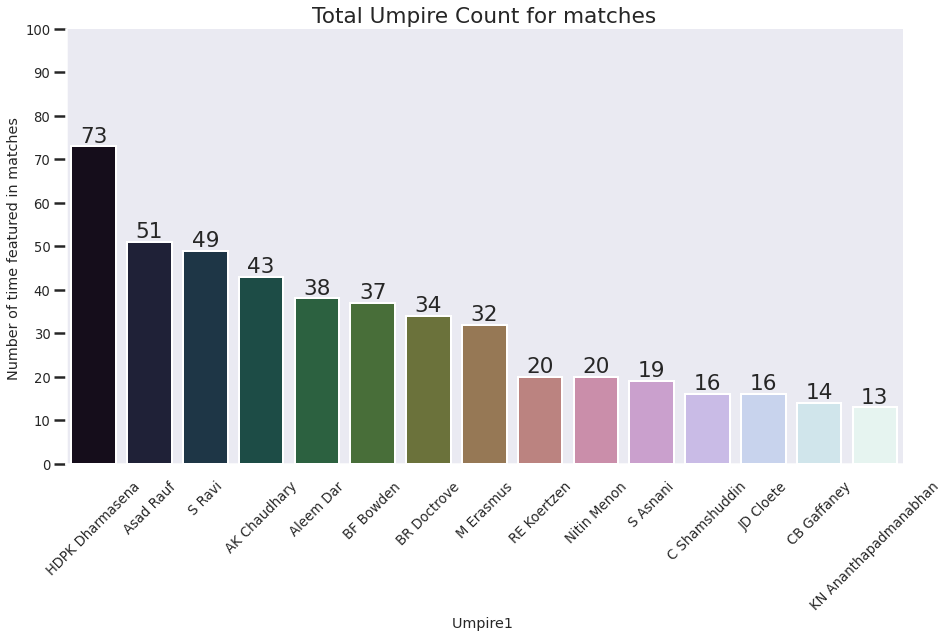

In [102]:
sns.set_style('dark')
plt.figure(figsize=(15,8))
ax=sns.countplot(x='umpire1',data=df4,palette=('cubehelix'),order=df4['umpire1'].value_counts().iloc[:15].index)
sns.set_context("poster", font_scale = 0.9)
plt.xlabel('Umpire1 ')
plt.ylabel('Number of time featured in matches ')
plt.title('Total Umpire Count for matches')
x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
#plt.legend(['Bat','Field'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax.yaxis.tick_left()


ax.yaxis.set_label_position('left')
ncount = 100
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text

    
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

(0.0, 100.0)

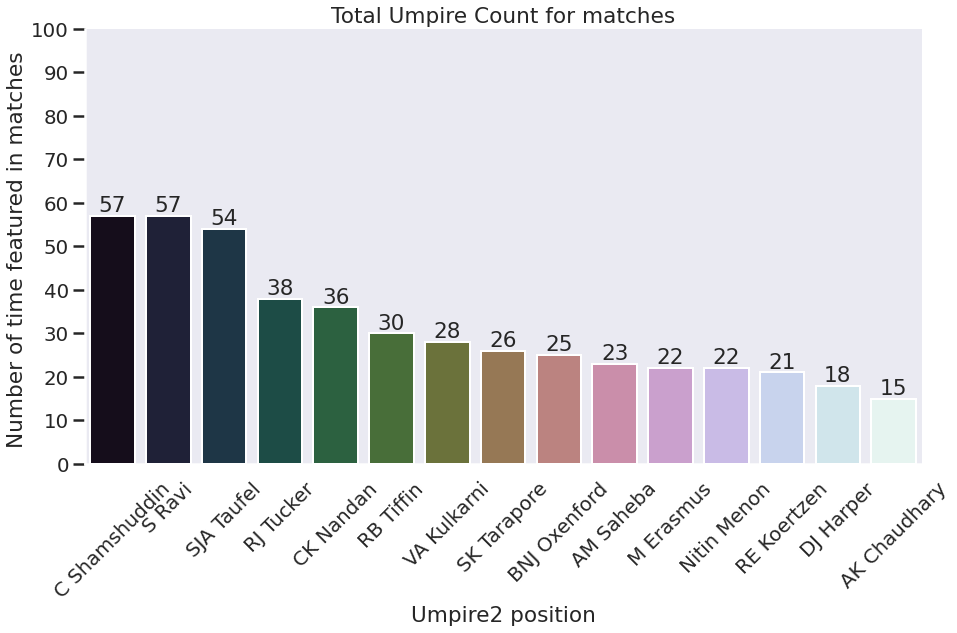

In [103]:

plt.figure(figsize=(15,8))
ax=sns.countplot(x='umpire2',data=df4,palette=('cubehelix'),order=df2['umpire2'].value_counts().iloc[:15].index)
sns.set_context("poster", font_scale = 0.9)
plt.xlabel('Umpire2 position')
plt.ylabel('Number of time featured in matches ')
plt.title('Total Umpire Count for matches')
x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
#plt.legend(['Bat','Field'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax.yaxis.tick_left()


ax.yaxis.set_label_position('left')
ncount = 100
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y),(x.mean(), y),ha='center', va='bottom') # set the alignment of the text

    
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax.set_ylim(0,ncount)

In [104]:
df4['umpire2'].value_counts().tail(10)

Nanda Kishore            2
Nigel Llong              2
Ian Gould                1
SD Fry                   1
KN Ananthapadmanabhan    1
SJ Davis                 1
JD Cloete                1
Nand Kishore             1
Kumar Dharmasena         1
Subroto Das              1
Name: umpire2, dtype: int64

### WOW!! Kumar Dharmasena has been umpire1 for maximum time and has served as umpire2 for just 1 time 

NOTE : HDPK Dharmasena in umpire1 and Kumar Dharmasena in umpire2 is the same person.

In [105]:
u1=df4[(df4['umpire1']=='HDPK Dharmasena')  |  (df4['umpire2']=='Kumar Dharmasena')]['winner'].index.tolist()

df_ump=df4['winner'].iloc[u1]
print(len(df_ump))
df_ump.value_counts()

74


Kolkata Knight Riders          14
Kings XI Punjab                11
Mumbai Indians                 11
Delhi Daredevils                7
Royal Challengers Bangalore     6
Rajasthan Royals                6
Rising Pune Supergiants         5
Chennai Super Kings             4
Deccan Chargers                 3
Kochi Tuskers Kerala            2
Gujarat Lions                   2
Sunrisers Hyderabad             2
Name: winner, dtype: int64

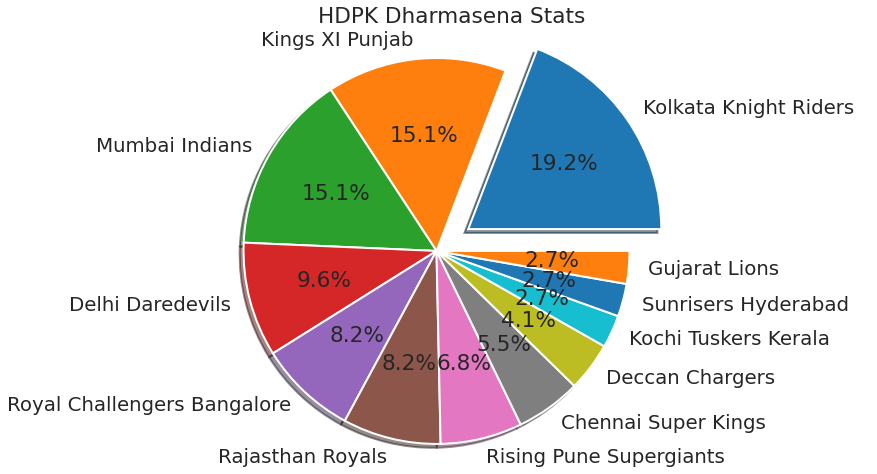

In [106]:
labels = ('Kolkata Knight Riders ', 'Kings XI Punjab', 'Mumbai Indians', 'Delhi Daredevils' , 'Royal Challengers Bangalore','Rajasthan Royals','Rising Pune Supergiants','Chennai Super Kings','Deccan Chargers ','Kochi Tuskers Kerala','Sunrisers Hyderabad','Gujarat Lions')
sizes = [14, 11,11,7,6,6,5,4,3,2,2,2]
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0)  # explode 1st slice ie how much slice will be separated


# Plot
plt.figure(figsize=(15,8))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True)#autopct will show percentage in floating channel
plt.axis('equal')
plt.title('HDPK Dharmasena Stats')
plt.show()

HDPK Dharmasena when featured as umpire1 or umpire2 it's seen that **Kolkata Knight Riders** has one the maximum number of times.

In [107]:
df5=df2[['city','toss_decision','winner']]
df5.head()

,city,toss_decision,winner
116,Mumbai,field,Rajasthan Royals
82,Jaipur,bat,Rajasthan Royals
81,Mumbai,field,Mumbai Indians
80,Chandigarh,bat,Kings XI Punjab
79,Hyderabad,bat,Royal Challengers Bangalore


In [108]:
df5['city'].value_counts()
df_cpy=del_df.copy()

### Maximum matches are played in Mumbai

## The above was the basic skeleton

### !!!Please use this statement --->  df_cpy=del_df.copy()  ..at this point in all previously submitted code till Day 13 to avoid one error

# Day16 - KKR vs KXIP

In [109]:
df_cpy=del_df.copy()
#df2 for matches dataset and df_cpy for deleveries datase
df2['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [110]:
day16=df2[((df2['team1']=='Kolkata Knight Riders') & (df2['team2']=='Kings XI Punjab')) |(df2['team2']=='Kolkata Knight Riders') & (df2['team1']=='Kings XI Punjab')  ]
day16.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
80,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
111,112,2008,Kolkata,2008-05-25,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,3,Umar Gul,Eden Gardens,SJ Davis,I Shivram,NaN
122,123,2009,Durban,2009-04-21,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,NaN
141,142,2009,Port Elizabeth,2009-05-03,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kings XI Punjab,0,6,DPMD Jayawardene,St George's Park,S Asnani,MR Benson,NaN
195,196,2010,Chandigarh,2010-03-27,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,39,0,MK Tiwary,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,S Ravi,NaN


In [ ]:
#Head to Head 

print("No of times KKR won the match : "+ str(len(day16[day16['winner']=='Kolkata Knight Riders'])))
print("No of times KXIP won the match : "+ str(len(day16[day16['winner']=='Kings XI Punjab'])))

In [111]:
#No of matches played between them
matches=df_cpy[((df_cpy['batting_team']=='Kings XI Punjab') & (df_cpy['bowling_team']=='Kolkata Knight Riders')) |(df_cpy['batting_team']=='Kolkata Knight Riders') & (df_cpy['bowling_team']=='Kings XI Punjab')]['match_id'].nunique()
matches

25

In [112]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [113]:
d16=df_cpy[((df_cpy['batting_team']=='Kings XI Punjab') & (df_cpy['bowling_team']=='Kolkata Knight Riders')) |((df_cpy['batting_team']=='Kolkata Knight Riders') & (df_cpy['bowling_team']=='Kings XI Punjab'))]
d16.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
177164,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,3,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177165,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,4,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177166,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,5,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
177167,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,6,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177168,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,7,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [114]:
#Dot balls bowled in entire match 


kkr_dot=d16[(d16['bowling_team']=='Kolkata Knight Riders') &(d16['extra_runs']==0) & (d16['batsman_runs']==0)]['ball'].count()
print("Total KKR dot balls :" + str(kkr_dot))

kxip_dot=d16[(d16['bowling_team']=='Kings XI Punjab') &(d16['extra_runs']==0) & (d16['batsman_runs']==0)]['ball'].count()
print("Total KXIP dot balls :" + str(kxip_dot))



print('Mean dot balls of both team :' + str((kkr_dot+kxip_dot)/matches))



#OVERALL


kkr_mat=df_cpy[(df_cpy['bowling_team']=='Kolkata Knight Riders')]['match_id'].nunique()
kxip_mat=df_cpy[(df_cpy['bowling_team']=='Kings XI Punjab')]['match_id'].nunique()


print("\nKKR")
kkr_dot=df_cpy[(df_cpy['bowling_team']=='Kolkata Knight Riders') &(df_cpy['extra_runs']==0) & (df_cpy['batsman_runs']==0)]['ball'].count()
print("Overall Total KKR dot balls :" + str(kkr_dot))
print('KKR Overall Mean dot balls :' + str((kkr_dot)/kkr_mat))



print("\nKXIP")
kxip_dot=df_cpy[(df_cpy['bowling_team']=='Kings XI Punjab') &(df_cpy['extra_runs']==0) & (df_cpy['batsman_runs']==0)]['ball'].count()
print("Overall Total KXIP dot balls :" + str(kxip_dot))



print('KXIP Overall Mean dot balls  :' + str((kxip_dot)/kxip_mat))



Total KKR dot balls :1037
Total KXIP dot balls :964
Mean dot balls of both team :80.04

KKR
Overall Total KKR dot balls :7339
KKR Overall Mean dot balls :41.23033707865169

KXIP
Overall Total KXIP dot balls :7103
KXIP Overall Mean dot balls  :40.35795454545455


In [115]:
#Wickets from 90th ball to 120th ball


#Dot balls bowled in entire match 


kkr_wic=d16[(d16['batting_team']=='Kolkata Knight Riders') &((d16['over']>=15) & (d16['over']<=20))]['dismissal_kind'].count()
print("Total KKR wickets fall in last 5 overs :" + str(kkr_wic))

kxip_wic=d16[(d16['batting_team']=='Kings XI Punjab') &((d16['over']>=15) & (d16['over']<=20))]['dismissal_kind'].count()
print("Total KXIP wickets fall in last 5 overs :" + str(kxip_wic))



print('Mean wickets of both team :' + str((kkr_wic+kxip_wic)/matches))



#OVERALL
print("\nKKR")

kkr_mat=df_cpy[(df_cpy['batting_team']=='Kolkata Knight Riders')]['match_id'].nunique()
kxip_mat=df_cpy[(df_cpy['batting_team']=='Kings XI Punjab')]['match_id'].nunique()


kkr_wic=df_cpy[(df_cpy['batting_team']=='Kolkata Knight Riders') &((df_cpy['over']>=15) & (df_cpy['over']<=20))]['dismissal_kind'].count()
print("OVERALL Total KKR wickets fall in last 5 overs :" + str(kkr_wic))

print('\nKKR Overall Wickets :' + str((kkr_wic)/kkr_mat))


print("\nKXIP")
kxip_wic=df_cpy[(df_cpy['batting_team']=='Kings XI Punjab') &((df_cpy['over']>=15) & (df_cpy['over']<=20))]['dismissal_kind'].count()
print("OVERALL Total KXIP wickets fall in last 5 overs :" + str(kxip_wic))

print('\nKXIP Overall Wickets  :' + str((kxip_wic)/kxip_mat))



Total KKR wickets fall in last 5 overs :53
Total KXIP wickets fall in last 5 overs :74
Mean wickets of both team :5.08

KKR
OVERALL Total KKR wickets fall in last 5 overs :424

KKR Overall Wickets :2.3820224719101124

KXIP
OVERALL Total KXIP wickets fall in last 5 overs :454

KXIP Overall Wickets  :2.5795454545454546


In [116]:
d16[d16['batting_team']=='Kings XI Punjab']['batsman'].unique()

array(['HM Amla', 'M Vohra', 'MP Stoinis', 'GJ Maxwell', 'DA Miller',
       'WP Saha', 'MM Sharma', 'AR Patel', 'VR Aaron', 'MJ Guptill',
       'SE Marsh', 'Swapnil Singh', 'R Tewatia', 'JR Hopes',
       'KC Sangakkara', 'Yuvraj Singh', 'DPMD Jayawardene', 'K Goel',
       'IK Pathan', 'PP Chawla', 'TM Srivastava', 'RS Bopara', 'T Kohli',
       'S Sohal', 'SM Katich', 'MS Bisla', 'B Lee', 'AC Gilchrist',
       'PC Valthaty', 'KD Karthik', 'AM Nayar', 'DJ Hussey',
       'Bipul Sharma', 'P Kumar', 'Mandeep Singh', 'P Dogra',
       'AD Mascarenhas', 'Harmeet Singh', 'BA Bhatt', 'Azhar Mahmood',
       'Gurkeerat Singh', 'MS Gony', 'CA Pujara', 'V Sehwag', 'GJ Bailey',
       'R Dhawan', 'MG Johnson', 'L Balaji', 'Sandeep Sharma',
       'Karanveer Singh', 'M Vijay', 'NLTC Perera', 'Anureet Singh',
       'P Sahu', 'KJ Abbott', 'KL Rahul', 'CH Gayle', 'MA Agarwal',
       'KK Nair', 'AJ Finch', 'R Ashwin', 'AJ Tye', 'BB Sran', 'SN Khan',
       'N Pooran', 'S Curran'], dtype=object)

In [117]:
#Glenn Maxwells Contribution


m_id =list(d16[d16['batsman']=='GJ Maxwell']['match_id'].unique())
runs_l=[]

tot=d16[d16['batsman']=='GJ Maxwell']['total_runs'].sum()
print("MAXWELL runs : " + str(tot))
sum=0
for i in m_id : 



    team_runs=d16[(d16['batting_team']=='Kings XI Punjab') & (d16['match_id']==i )]['total_runs'].sum()
    print("team runs: "+ str(team_runs))
    sum=team_runs+sum
    
print("\n Total Team runs : " + str(sum))
contri=(tot/sum)*100

print("\nContribution of MAXWELL is : " + str(contri))

MAXWELL runs : 272
team runs: 170
team runs: 167
team runs: 132
team runs: 149
team runs: 135
team runs: 199
team runs: 155
team runs: 183
team runs: 138
team runs: 157

 Total Team runs : 1585

Contribution of MAXWELL is : 17.160883280757098


In [118]:
#OVERALL
#Glenn Maxwells Contribution


m_id=list(df_cpy[(df_cpy['batsman']=='GJ Maxwell') & (df_cpy['batting_team']=='Kings XI Punjab')]['match_id'].unique())

runs_l=[]

tot=df_cpy[(df_cpy['batting_team']=='Kings XI Punjab') & (df_cpy['batsman']=='GJ Maxwell')]['total_runs'].sum()
print("OVERALL MAXWELL runs : " + str(tot))
sum=0
for i in m_id : 



    team_runs=df_cpy[(df_cpy['batting_team']=='Kings XI Punjab') & (df_cpy['match_id']==i )]['total_runs'].sum()
    print("team runs: "+ str(team_runs))
    sum=team_runs+sum
    
print("\nOVERALL Total Team runs : " + str(sum))
contri=(tot/sum)*100

print("\n OVERALL Contribution of MAXWELL is : " + str(contri))

OVERALL MAXWELL runs : 1262
team runs: 164
team runs: 150
team runs: 170
team runs: 137
team runs: 154
team runs: 198
team runs: 188
team runs: 181
team runs: 138
team runs: 189
team runs: 167
team runs: 230
team runs: 73
team runs: 206
team runs: 193
team runs: 193
team runs: 132
team runs: 127
team runs: 168
team runs: 231
team runs: 198
team runs: 149
team runs: 211
team runs: 165
team runs: 156
team runs: 119
team runs: 135
team runs: 226
team runs: 199
team runs: 136
team runs: 177
team runs: 165
team runs: 155
team runs: 206
team runs: 149
team runs: 88
team runs: 183
team runs: 180
team runs: 106
team runs: 130
team runs: 161
team runs: 111
team runs: 153
team runs: 138
team runs: 143
team runs: 164
team runs: 154
team runs: 157
team runs: 181
team runs: 127

OVERALL Total Team runs : 8111

 OVERALL Contribution of MAXWELL is : 15.559117248181481


In [119]:
#TOTAL NO BALLS in a MATCH


kkr_no=d16[(d16['bowling_team']=='Kolkata Knight Riders') &  (d16['noball_runs']==1)]['noball_runs'].count()
print("KKR total no balls : " + str(kkr_no))

kxip_no=d16[(d16['batting_team']=='Kings XI Punjab') & (d16['noball_runs']==1)]['noball_runs'].count()
print("KXIP total no balls : " + str(kxip_no))

print("Total no balls of both the teams in all matches : " + str(kkr_no + kxip_no))

print("\n---------------------------------------------------------------------")

#Average total of both the teams 
avg=(kkr_no + kxip_no)/matches

print("\n(Average) Total no balls in a match is : " + str(avg))

KKR total no balls : 5
KXIP total no balls : 5
Total no balls of both the teams in all matches : 10

---------------------------------------------------------------------

(Average) Total no balls in a match is : 0.4


In [120]:
#OVERALL
#TOTAL NO BALLS in a MATCH

kkr_mat=df_cpy[(df_cpy['batting_team']=='Kolkata Knight Riders')]['match_id'].nunique()
kxip_mat=df_cpy[(df_cpy['batting_team']=='Kings XI Punjab')]['match_id'].nunique()

print("\nKKR")
kkr_no=df_cpy[(df_cpy['bowling_team']=='Kolkata Knight Riders') &  (df_cpy['noball_runs']==1)]['noball_runs'].count()
print("OVERALL KKR total no balls : " + str(kkr_no))
print("\n(Average) Total no balls in a match is : " + str(kkr_no/kkr_mat))


print("\n---------------------------------------------------------------------")

print("\nKXIP")

kxip_no=df_cpy[(df_cpy['batting_team']=='Kings XI Punjab') & (df_cpy['noball_runs']==1)]['noball_runs'].count()
print("OVERALL KXIP total no balls : " + str(kxip_no))
print("\n(Average) Total no balls in a match is : " + str(kxip_no/kxip_mat))








KKR
OVERALL KKR total no balls : 77

(Average) Total no balls in a match is : 0.43258426966292135

---------------------------------------------------------------------

KXIP
OVERALL KXIP total no balls : 62

(Average) Total no balls in a match is : 0.3522727272727273
